In [1]:
import seaborn as sns
from sklearn.model_selection import train_test_split

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('seattle-weather.csv')

df = df[df['weather'].isin(['rain', 'sun'])]

df = df.drop(columns=['date'])

df['weather'] = df['weather'].replace(['rain', 'sun'], [1, 0])

df

,precipitation,temp_max,temp_min,wind,weather
1,10.9,10.6,2.8,4.5,1
2,0.8,11.7,7.2,2.3,1
3,20.3,12.2,5.6,4.7,1
4,1.3,8.9,2.8,6.1,1
5,2.5,4.4,2.2,2.2,1
...,...,...,...,...,...
1455,0.0,4.4,0.0,2.5,0
1456,8.6,4.4,1.7,2.9,1
1457,1.5,5.0,1.7,1.3,1
1459,0.0,5.6,-1.0,3.4,0


In [2]:
df['temp_max']=df['temp_max'].round(2)
df['temp_min']=df['temp_min'].round(2)
df['wind']=df['wind'].round(2)

def formatear_a_dos_decimales(valor):
    return f"{valor:.2f}"

columnas_flotantes = df.select_dtypes(include=['float']).columns
formato = {col: formatear_a_dos_decimales for col in columnas_flotantes}

In [3]:
texto=df.head(10).to_latex(formatters=formato)

with open('tabla.tex', 'w') as f:
    f.write(texto)

In [4]:
correlation_matrix = df.corr()

print(correlation_matrix)

               precipitation  temp_max  temp_min      wind   weather
precipitation       1.000000 -0.233334 -0.066462  0.312007  0.472722
temp_max           -0.233334  1.000000  0.864699 -0.186461 -0.443492
temp_min           -0.066462  0.864699  1.000000 -0.085976 -0.180219
wind                0.312007 -0.186461 -0.085976  1.000000  0.248546
weather             0.472722 -0.443492 -0.180219  0.248546  1.000000


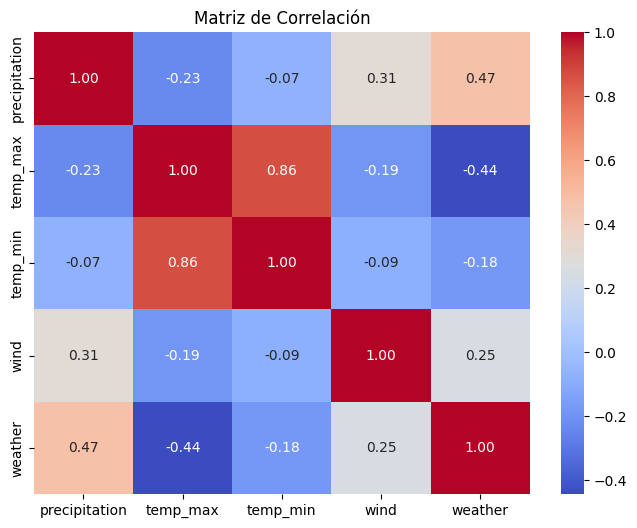

In [5]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

In [6]:
df['temp_max'] = df['temp_max'].apply(lambda x: x*-1)
df.head(10)

,precipitation,temp_max,temp_min,wind,weather
1,10.9,-10.6,2.8,4.5,1
2,0.8,-11.7,7.2,2.3,1
3,20.3,-12.2,5.6,4.7,1
4,1.3,-8.9,2.8,6.1,1
5,2.5,-4.4,2.2,2.2,1
6,0.0,-7.2,2.8,2.3,1
7,0.0,-10.0,2.8,2.0,0
8,4.3,-9.4,5.0,3.4,1
9,1.0,-6.1,0.6,3.4,1
10,0.0,-6.1,-1.1,5.1,0


               precipitation  temp_max  temp_min      wind   weather
precipitation       1.000000  0.233334 -0.066462  0.312007  0.472722
temp_max            0.233334  1.000000 -0.864699  0.186461  0.443492
temp_min           -0.066462 -0.864699  1.000000 -0.085976 -0.180219
wind                0.312007  0.186461 -0.085976  1.000000  0.248546
weather             0.472722  0.443492 -0.180219  0.248546  1.000000


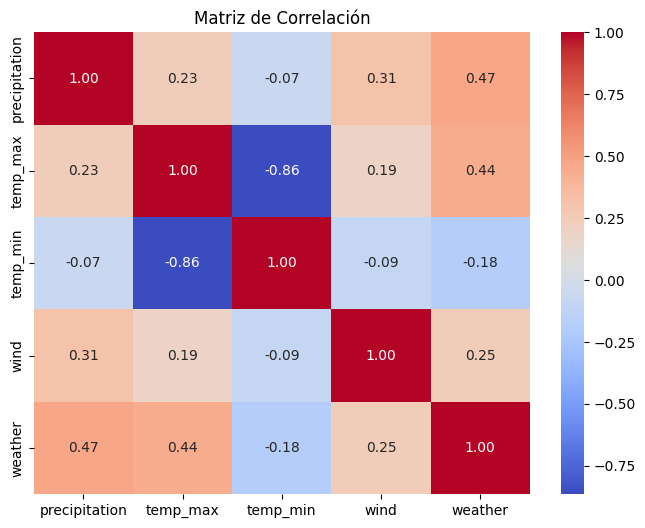

In [7]:
correlation_matrix = df.corr()

print(correlation_matrix)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

In [8]:
X = df[['temp_max', 'wind']]

y = df['weather']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

lista = list(zip(X_train['temp_max'], X_train['wind'], y_train))

print(lista)



[(-11.1, 4.0, 1), (-23.3, 2.7, 1), (-10.6, 3.2, 1), (-2.2, 1.5, 0), (-28.3, 2.5, 1), (-18.9, 3.3, 1), (-7.8, 3.2, 1), (-14.4, 3.3, 1), (-17.2, 3.7, 1), (-24.4, 2.7, 0), (-20.6, 2.6, 0), (-22.2, 3.6, 0), (-9.4, 4.1, 1), (-21.1, 4.1, 1), (-8.9, 2.7, 0), (-26.7, 3.9, 0), (-13.9, 4.2, 1), (-26.1, 2.0, 0), (-16.7, 2.1, 1), (-12.2, 4.8, 0), (-13.9, 5.6, 1), (-12.8, 5.5, 1), (-22.8, 3.2, 0), (-21.7, 3.2, 0), (-13.3, 4.8, 1), (-6.7, 2.3, 0), (-20.6, 3.0, 1), (-26.1, 2.6, 0), (-17.2, 4.7, 1), (-10.0, 7.3, 1), (-21.1, 3.8, 0), (-9.4, 4.6, 0), (-29.4, 3.0, 0), (-12.8, 3.9, 1), (-15.6, 2.5, 0), (-24.4, 2.5, 0), (-11.7, 5.9, 1), (-15.6, 1.6, 0), (-15.6, 3.8, 0), (-15.6, 5.0, 1), (-10.0, 5.1, 1), (-15.6, 2.7, 0), (-13.9, 2.6, 1), (-13.9, 5.9, 0), (-16.1, 4.0, 0), (-16.1, 4.4, 0), (-20.0, 1.9, 1), (-14.4, 3.9, 1), (-33.9, 2.4, 0), (-11.7, 2.5, 0), (-28.3, 2.7, 1), (-23.9, 1.8, 0), (-5.6, 3.1, 1), (-27.8, 4.3, 0), (-11.7, 4.7, 1), (-18.9, 3.9, 0), (-20.6, 3.8, 0), (-25.6, 3.4, 0), (-13.3, 2.4, 0), (-2

In [9]:

temp_max_min = X_train['temp_max'].min()
temp_max_max = X_train['temp_max'].max()

wind_min = X_train['wind'].min()
wind_max = X_train['wind'].max()

print(temp_max_min, temp_max_max, wind_min, wind_max)


-35.0 1.6 0.5 9.5


In [10]:

class KDNode:
    def __init__(self, x, y, label):
        self.point = (x, y)
        self.left = None
        self.right = None
        self.label = label

class KDTree:
    def __init__(self, data):
        self.root = self.build_kdtree(data)

    def build_kdtree(self, data, depth=0):
        if not data:
            return None

        k = len(data[0]) - 1
        axis = depth % k

        data.sort(key=lambda x: x[axis])
        median = len(data) // 2

        node = KDNode(*data[median])
        node.left = self.build_kdtree(data[:median], depth + 1)
        node.right = self.build_kdtree(data[median + 1:], depth + 1)

        return node

    def knn(self, x, y, n):
        def closest_points(node, target, depth=0, k_nearest=[]):
            if node is None:
                return

            k = len(target)
            axis = depth % k

            next_node = None
            opposite_node = None

            if target[axis] < node.point[axis]:
                next_node = node.left
                opposite_node = node.right
            else:
                next_node = node.right
                opposite_node = node.left

            closest_points(next_node, target, depth + 1, k_nearest)

            if len(k_nearest) < n:
                k_nearest.append(node)

            elif self.distance(node.point, target) < self.distance(k_nearest[-1].point, target):
                k_nearest.pop()
                k_nearest.append(node)

            if self.distance(target[axis], node.point[axis]) < self.distance(target[axis], k_nearest[-1].point[axis]):
                closest_points(opposite_node, target, depth + 1, k_nearest)

        target = (x, y)
        k_nearest = []
        closest_points(self.root, target, k_nearest=k_nearest)

        return [(node.point[0], node.point[1], node.label) for node in k_nearest]

    def distance(self, point1, point2):
        return np.linalg.norm(np.array(point1) - np.array(point2))

# Ejemplo de uso:
# data = [(2.0, 3.0, 0), (5.0, 4.0, 1), (9.0, 6.0, 0), (4.0, 7.0, 1), (8.0, 1.0, 0)]
data = lista
kdtree = KDTree(data)

x_query = -7.0
y_query = 5.0
n_neighbors = 4
neighbors = kdtree.knn(x_query, y_query, n_neighbors)
print(neighbors)


[(-6.7, 5.8, 1), (-6.7, 6.0, 1), (-6.7, 4.9, 1), (-7.2, 4.7, 1)]


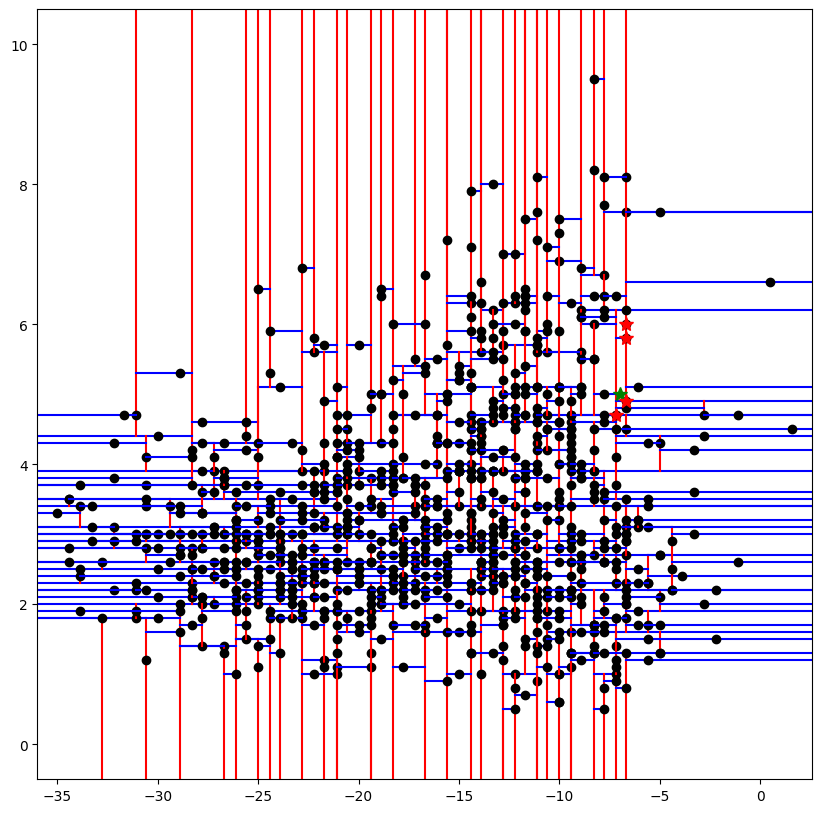

In [11]:
def plot_kdtree(root, min_x, max_x, min_y, max_y, prev_node, branch, depth=0):
    cur_node = root.point
    left_branch = root.left
    right_branch = root.right

    k = len(cur_node)

    axis = depth % k

    if axis == 0:
        if branch is not None and prev_node is not None:
            if branch:
                max_y = prev_node[1]
            else:
                min_y = prev_node[1]

        plt.plot([cur_node[0], cur_node[0]], [min_y, max_y], linestyle='-', color='red')

    elif axis == 1:
        if branch is not None and prev_node is not None:
            if branch:
                max_x = prev_node[0]
            else:
                min_x = prev_node[0]

        plt.plot([min_x, max_x], [cur_node[1], cur_node[1]], linestyle='-', color='blue')

    plt.plot(cur_node[0], cur_node[1], 'ko')

    if left_branch is not None:
        plot_kdtree(left_branch, min_x, max_x, min_y, max_y, cur_node, True, depth + 1)

    if right_branch is not None:
        plot_kdtree(right_branch, min_x, max_x, min_y, max_y, cur_node, False, depth + 1)
    
plt.figure(figsize=(10, 10))
plt.xlim(temp_max_min - 1, temp_max_max + 1)
plt.ylim(wind_min - 1, wind_max + 1)
plot_kdtree(kdtree.root, temp_max_min - 1, temp_max_max + 1, wind_min - 1, wind_max + 1, None, None)

plt.plot(x_query, y_query, 'g*', ms=10)
for neighbor in neighbors:
    plt.plot(neighbor[0], neighbor[1], 'r*', ms=10)
plt.show()

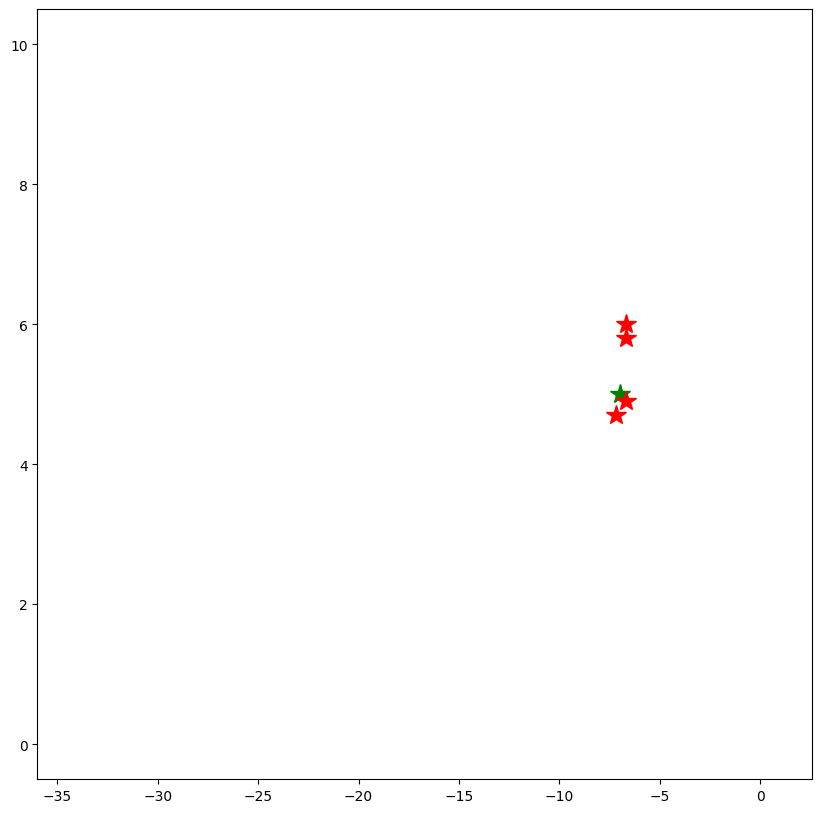

In [12]:
plt.figure(figsize=(10, 10))
plt.xlim(temp_max_min - 1, temp_max_max + 1)
plt.ylim(wind_min - 1, wind_max + 1)
plt.plot(x_query, y_query, 'g*', ms=15)
for neighbor in neighbors:
    plt.plot(neighbor[0], neighbor[1], 'r*', ms=15)
plt.show()
